In [2]:
import pandas_datareader as pdr

In [3]:
import pandas as pd

In [72]:
df2 = pd.read_csv('AAPL.csv')

In [79]:
df1 = df2.reset_index()['close']

In [6]:
import matplotlib.pyplot as plt

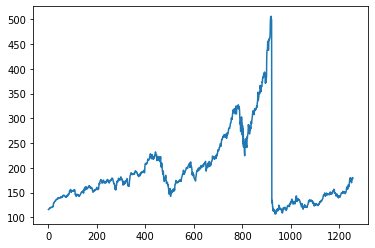

In [7]:
plt.plot(df1)

In [8]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
## splitting the data into train and test split
training_size = int((len(df1)) * 0.65)
test_size = int((len(df1)) - training_size)
train, test = df1[0:training_size, :], df1[training_size:len(df1), :]

In [10]:
## create timestep data
def create_dataset(dataset, timestep=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [84]:
time_step = 100
X_train, Y_train = create_dataset(train, time_step)
X_test, Y_test = create_dataset(test, time_step)

In [81]:
# reshape input to be [samples, time_step, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


339

In [20]:
# Create stacke LSTM
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 50, batch_size = 80, verbose =1)

Train on 716 samples, validate on 339 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
716/716 [==============================] - 4s 6ms/sample - loss: 0.0311 - val_loss: 0.0378
Epoch 2/50
716/716 [==============================] - 2s 3ms/sample - loss: 0.0065 - val_loss: 0.0124
Epoch 3/50
716/716 [==============================] - 2s 3ms/sample - loss: 0.0038 - val_loss: 0.0223
Epoch 4/50
716/716 [==============================] - 2s 3ms/sample - loss: 0.0022 - val_loss: 0.0148
Epoch 5/50
716/716 [==============================] - 2s 3ms/sample - loss: 0.0012 - val_loss: 0.0231
Epoch 6/50
716/716 [==============================] - 2s 3ms/sample - loss: 9.0708e-04 - val_loss: 0.0214
Epoch 7/50
716/716 [==============================] - 2s 3ms/sample - loss: 8.3138e-04 - val_loss: 0.0211
Epoch 8/50
716/716 [==============================] - 3s 4ms/sample - loss: 7.6471e-04 - val_loss: 0.0192
Epoch 9/50
716/716 [============

In [16]:
## predicting values
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(train_pred)

[[0.12064993]
 [0.12065668]
 [0.12049311]
 [0.12021151]
 [0.1198066 ]
 [0.11931938]
 [0.11891001]
 [0.11857265]
 [0.11832868]
 [0.11822878]
 [0.11825949]
 [0.118071  ]
 [0.11732697]
 [0.11600591]
 [0.11412083]
 [0.11174567]
 [0.10892478]
 [0.10601434]
 [0.10319501]
 [0.10065199]
 [0.09848319]
 [0.09676914]
 [0.0955033 ]
 [0.09454194]
 [0.09390429]
 [0.09345984]
 [0.0931475 ]
 [0.09290084]
 [0.09271681]
 [0.09252144]
 [0.09236202]
 [0.09230976]
 [0.09241574]
 [0.09269704]
 [0.09324276]
 [0.09412152]
 [0.09533691]
 [0.09685199]
 [0.09862942]
 [0.10054523]
 [0.10247652]
 [0.10441619]
 [0.10635459]
 [0.10828635]
 [0.11001496]
 [0.11137423]
 [0.11225627]
 [0.11271855]
 [0.11321267]
 [0.1138674 ]
 [0.11475934]
 [0.11600681]
 [0.11766464]
 [0.1197253 ]
 [0.12177701]
 [0.123685  ]
 [0.1254836 ]
 [0.12726007]
 [0.12898818]
 [0.13045509]
 [0.13153462]
 [0.13217057]
 [0.1325161 ]
 [0.13268653]
 [0.1327188 ]
 [0.13267903]
 [0.13269587]
 [0.13290256]
 [0.13335961]
 [0.13408971]
 [0.13505451]
 [0.13

In [21]:
from sklearn.preprocessing import MinMaxScaler
## transform back to original form of scaler
train_predict = scaler.inverse_transform(train_pred)
test_predict = scaler.inverse_transform(test_pred)

In [22]:
## calculate RMSE per matrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

200.2270146686285

In [23]:
math.sqrt(mean_squared_error(Y_test, test_predict))

150.67423216587846

In [67]:
# x_input=X_test[341:].reshape(1, -1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
X_test[341:]

array([], shape=(0, 100, 1), dtype=float64)

In [68]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((0, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((0, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


IndexError: list index out of range